In [ ]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Constant Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = 0.5*np.ones((n,1))

x = scaler(x, a=0, b=np.pi)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)


In [ ]:
saver(qnn_list, data_path("trainability_qnn_1D_reps_1_constant"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2_constant"))

In [ ]:
np.random.seed(42)

dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_constant"))

## 1D, Gaussian Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 6, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 6, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Generate Data

In [3]:
np.random.seed(42)

n = 5
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

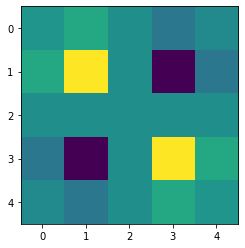

In [4]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 5,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_single_circuit"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 6, 6, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### More data

In [5]:
np.random.seed(42)

n = 8
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

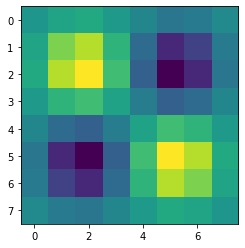

In [6]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1_moredata"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2_moredata"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [3, 6, 6, 1],
                     lr = 0.01)
    
    dnn.train(x, y, epochs=100000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_moredata"))

### Deep QNN

In [7]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3, 5],
                         dim = [3, 5, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_deep"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.030154341983840906
epoch: 1, loss: 0.01788202212298247
epoch: 2, loss: 0.012848985713904065
epoch: 3, loss: 0.012346519402410158
epoch: 4, loss: 0.012800941529223377
epoch: 5, loss: 0.012456909741732048
epoch: 6, loss: 0.01174137200500898
epoch: 7, loss: 0.011536189023872467
epoch: 8, loss: 0.01175166058439705
epoch: 9, loss: 0.011972456762956463
epoch: 10, loss: 0.011710162873489013
epoch: 11, loss: 0.01144032790945219
epoch: 12, loss: 0.010968890179114753
epoch: 13, loss: 0.010427537802477935
epoch: 14, loss: 0.009971429167618891
epoch: 15, loss: 0.009625986438309107
epoch: 16, loss: 0.009347818661127246
epoch: 17, loss: 0.009240889621011668
epoch: 18, loss: 0.009042177983894971
epoch: 19, loss: 0.00879696978525826
epoch: 20, loss: 0.008599139696164392
epoch: 21, loss: 0.00852496361038503
epoch: 22, loss: 0.008337976274603908
epoch: 23, loss: 0.008188264319291105
epoch: 24, loss: 0.00806047100998615
epoch: 25, loss: 0.008152006627446412
epoch: 26, loss: 0.0079826554